Below is some code (atc_parser.py) used to parse ATC information per drug based on its Class_ID. 

In [1]:
'''
Script for parsing ATC.csv file from its found format to one that is useful
ATC.csv is found at the following website:
https://bioportal.bioontology.org/ontologies/ATC
Downloaded version: 2019AB released 11/04/2019 uploaded 11/18/2019
This file was used instead of the WHO's query database which would need to
individually query each drug compound. This is a compiled database of the same.
The WHO codes in atc_to_class.tsv are from Wikipedia
https://en.wikipedia.org/wiki/ATC_code_A for A classification, etc.
Can we find the additional classifications, since this only shows level 1 and level 2?
'''

import numpy as np
import pandas as pd

def parse_atc_to_class(file_name):
    lines = [item.strip("\n") for item in open(file_name).readlines()]
    tab = {}
    for l in lines:
        s = l.split(",")
        tab[s[0]] = s[1]
    return tab

atc_file = pd.read_csv('ATC.csv')
atc_to_class = parse_atc_to_class('atc_to_class.tsv')

#print(atc_file[0:10])
#print(atc_to_class)
#print(atc_file["Class ID"])
#atc_file[['asdf','ATC']] = atc_file["Class ID"].str.split(" ",expand=True,)
#print(atc_file["ATC"])

headers = ["Drug","Class_ID","Classification"]
out_file = pd.DataFrame(columns=headers)
for i in range(len(atc_file)):
    class_id = atc_file["Class ID"][i].split("/")[-1]
    drug = atc_file["Preferred Label"][i]
    #print(class_id+"\t"+drug)
    classif = "NA"
    #print(class_id[0:3])
    if(class_id[0:3] in atc_to_class):
        classif = atc_to_class[class_id[0:3]]
    #print(drug+'\t'+classif)
    dic = {headers[0]:drug,
            headers[1]:class_id,
            headers[2]:classif}
    out_file = out_file.append(dic, ignore_index=True)
out_file.to_csv("ATC_Mapping.csv",index=False)

In [2]:
print(out_file)

                                                   Drug Class_ID  \
0                                             silicones  A03AX13   
1                                           cefatrizine  J01DB07   
2     Technetium 99m compounds, central nervous syst...    V09AA   
3                                        urofollitropin  G03GA04   
4                                          promethazine  D04AA10   
...                                                 ...      ...   
6353                                            poldine  A03AB11   
6354               eritrityl tetranitrate, combinations  C01DA63   
6355                 Oral rehydration salt formulations    A07CA   
6356                                 Inorganic Chemical     T197   
6357                                         fomivirsen  S01AD08   

                                         Classification  
0       Drugs for functional gastrointestinal disorders  
1                       Antibacterials for systemic use  
2        

In "out_file", we have three columns: Drug, Class_ID, and Classification
Drug is self explainatory, Class_ID is the ATC classification code from the WHO, and Classification is the drug class corresponding to the Class_ID. There are 6358 unique drugs (although a handfull seem to be drug classes and don't have a corresponding classification). Seen below, these without classifications make up 141 "drugs" which do not appear to be drugs. I think it's safe to exclude these.

In [11]:
out_file[out_file['Classification'] == "NA"]

,Drug,Class_ID,Classification
35,Occupational Activity,T057,NA
51,Disease or Syndrome,T047,NA
75,Substance,T167,NA
147,Machine Activity,T066,NA
151,Sign or Symptom,T184,NA
...,...,...,...
6202,Archaeon,T194,NA
6318,Bird,T012,NA
6320,Amino Acid Sequence,T087,NA
6347,Biomedical or Dental Material,T122,NA


In [13]:
print(list(out_file[out_file['Classification'] == "NA"]["Drug"]))

['Occupational Activity', 'Disease or Syndrome', 'Substance', 'Machine Activity', 'Sign or Symptom', 'Chemical', 'SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMONES AND INSULINS', 'Cell Component', 'Plant', 'Conceptual Entity', 'Phenomenon or Process', 'Virus', 'Fish', 'Biologically Active Substance', 'Drug Delivery Device', 'Carbohydrate Sequence', 'Human', 'Enzyme', 'MUSCULO-SKELETAL SYSTEM DRUGS', 'Pathologic Function', 'NERVOUS SYSTEM DRUGS', 'Amino Acid, Peptide, or Protein', 'Population Group', 'Anatomical Structure', 'Vitamin', 'Antibiotic', 'Injury or Poisoning', 'Clinical Drug', 'SENSORY ORGAN DRUGS', 'Bacterium', 'Food', 'Health Care Activity', 'Chemical Viewed Structurally', 'RESPIRATORY SYSTEM DRUGS', 'Classification', 'Idea or Concept', 'Element, Ion, or Isotope', 'Anatomical Abnormality', 'Mental or Behavioral Dysfunction', 'Biologic Function', 'Qualitative Concept', 'Clinical Attribute', 'Regulation or Law', 'Eukaryote', 'Human-caused Phenomenon or Process', 'Nucleic Aci

Do any of these drugs appear multiple times?

In [20]:
num_drugs = len(out_file["Drug"])
num_unique_drugs = len(np.unique(list(out_file["Drug"])))
print("Number of drugs: "+str(num_drugs))
print("Number of unique drugs: "+str(num_unique_drugs))

Number of drugs: 6358
Number of unique drugs: 5667


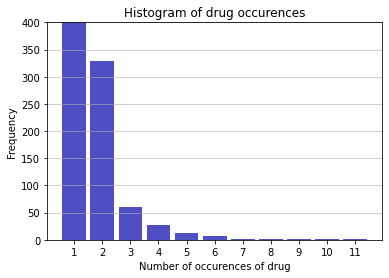

Histogram is truncated for first bin which achieves a frequency of 5221


In [54]:
unique_drugs, drug_freq = np.unique(list(out_file["Drug"]),return_counts=True)
#for d,f in zip(unique_drugs,drug_freq):
#    if f > 1:
#        print(d+"\t"+str(f))

# histogram
# source: https://realpython.com/python-histograms/
import matplotlib.pyplot as plt
def histogram(d):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(x=d, bins=np.arange(1,13), color='#0504aa',
                            alpha=0.7, rwidth=0.85,align='left')
    #n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
    #                        alpha=0.7, rwidth=0.85)
    #print(bins)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Number of occurences of drug')
    plt.ylabel('Frequency')
    plt.title('Histogram of drug occurences')
    plt.xticks(np.arange(1, 12, step=1))
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    #plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.ylim(ymax=400)
    plt.show()
    print("Histogram is truncated for first bin which achieves a frequency of "+str(int(maxfreq)))
    
histogram(drug_freq)    

In [58]:
for i in np.unique(drug_freq)[::-1]:
    #print(i)
    drugs_freq = []
    for d,f in zip(unique_drugs,drug_freq):
        if f == i :
            drugs_freq += [d]
            #print(d+"\t"+str(f))
    print("Frequency: "+str(i)+"\t"+"Count: "+str(len(drugs_freq)))
    print(str(drugs_freq))
        

Frequency: 11	Count: 2
['betamethasone', 'dexamethasone']
Frequency: 10	Count: 1
['prednisolone']
Frequency: 9	Count: 2
['hydrocortisone', 'neomycin']
Frequency: 8	Count: 2
['chlorhexidine', 'triamcinolone']
Frequency: 7	Count: 2
['chloramphenicol', 'lidocaine']
Frequency: 6	Count: 7
['epinephrine', 'fluorometholone', 'miconazole', 'nitrofural', 'phenylephrine', 'povidone-iodine', 'tetracycline']
Frequency: 5	Count: 13
['benzydamine', 'cinchocaine', 'clioquinol', 'cromoglicic acid', 'ephedrine', 'gentamicin', 'hexamidine', 'ibuprofen', 'insulin (human)', 'magnesium sulfate', 'metronidazole', 'natamycin', 'polymyxin B']
Frequency: 4	Count: 28
['amphotericin B', 'beclometasone', 'benzocaine', 'budesonide', 'cetylpyridinium', 'chlorquinaldol', 'chlortetracycline', 'ciprofloxacin', 'cocaine', 'diclofenac', 'fluocinolone acetonide', 'fluocortolone', 'flurbiprofen', 'fusidic acid', 'hyaluronic acid', 'hydrogen peroxide', 'indometacin', 'insulin (beef)', 'insulin (pork)', 'mannitol', 'mepartr

In [14]:
# Translating this output data into a hashtable for easy querying
drug_to_classification = {}
for i in range(len(out_file)):
    line = out_file.loc[i]
    drug = line["Drug"]
    classif = line["Classification"]
    if classif != "NA":
        drug_to_classification[drug] = classif
print(drug_to_classification)

{'silicones': 'Drugs for functional gastrointestinal disorders', 'cefatrizine': 'Antibacterials for systemic use', 'Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals': 'Diagnostic radiopharmaceuticals', 'urofollitropin': 'Sex hormones and modulators of the genital system', 'promethazine': 'Antihistamines for systemic use', 'pinacidil and diuretics': 'Antihypertensives', 'sargramostim': 'Immunostimulants', 'cilostazol': 'Antithrombotic agents', 'emepronium, combinations': 'Psycholeptics', 'lanadelumab': 'Other hematological agents', 'androstanolone': 'Sex hormones and modulators of the genital system', 'Beta blocking agents, selective, thiazides and other diuretics': 'Beta blocking agents', 'mefenorex': 'Antiobesity preparations', 'BACTERIAL AND VIRAL VACCINES, COMBINED': 'Vaccines', 'emtricitabine': 'Antivirals for systemic use', 'aliskiren and amlodipine': 'Agents acting on the renin–angiotensin system', 'imiquimod': 'Antibiotics and chemotherapeutics fo

## Parsing KIBA 
The original file is from the Supplementary data for the KIBA dataset paper. This can be found here: https://pubs.acs.org/doi/pdf/10.1021/ci400709d under "Supporting Information" header. The input file is from the tab sheet "KIBA" in the original file, saved a .csv
- Original file: ci400709d_si_002.xlsx
- Input file: "kiba_in_csv.csv"







In [67]:
kiba_file = "kiba_in_csv.csv"
kiba_matrix = pd.read_csv(kiba_file,low_memory=False,index_col=0)


In [68]:
print(kiba_matrix.shape)

(52498, 467)


In [71]:
print((kiba_matrix.columns))
print(kiba_matrix)

Index(['O00141', 'O00142', 'O00238', 'O00311', 'O00329', 'O00418', 'O00443',
       'O00444', 'O00506', 'O00750',
       ...
       'Q9Y463', 'Q9Y478', 'Q9Y4K4', 'Q9Y572', 'Q9Y5S2', 'Q9Y616', 'Q9Y6E0',
       'Q9Y6K9', 'Q9Y6M4', 'Q9Y6R4'],
      dtype='object', length=467)
              O00141  O00142    O00238    O00311  O00329  O00418  O00443  \
CHEMBL10         NaN     NaN  3.518514  3.100002     4.0     3.6     NaN   
CHEMBL1000       NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL100012     NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL100016     NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL100050     NaN     NaN       NaN       NaN     NaN     NaN     NaN   
...              ...     ...       ...       ...     ...     ...     ...   
CHEMBL99852      NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL99859      NaN     NaN       NaN       NaN     NaN     NaN     NaN   
CHEMBL99923      NaN     NaN       NaN    

In [77]:
list(kiba_matrix.index)

['CHEMBL10',
 'CHEMBL1000',
 'CHEMBL100012',
 'CHEMBL100016',
 'CHEMBL100050',
 'CHEMBL100076',
 'CHEMBL100079',
 'CHEMBL100102',
 'CHEMBL100172',
 'CHEMBL100174',
 'CHEMBL100220',
 'CHEMBL100262',
 'CHEMBL100296',
 'CHEMBL100305',
 'CHEMBL100309',
 'CHEMBL100312',
 'CHEMBL100391',
 'CHEMBL100421',
 'CHEMBL100446',
 'CHEMBL100473',
 'CHEMBL100485',
 'CHEMBL100500',
 'CHEMBL100523',
 'CHEMBL100542',
 'CHEMBL100546',
 'CHEMBL100551',
 'CHEMBL100553',
 'CHEMBL100569',
 'CHEMBL100577',
 'CHEMBL1006',
 'CHEMBL100645',
 'CHEMBL100650',
 'CHEMBL100651',
 'CHEMBL100664',
 'CHEMBL100670',
 'CHEMBL100675',
 'CHEMBL100687',
 'CHEMBL100703',
 'CHEMBL100714',
 'CHEMBL100734',
 'CHEMBL100735',
 'CHEMBL100736',
 'CHEMBL100739',
 'CHEMBL100775',
 'CHEMBL100803',
 'CHEMBL100804',
 'CHEMBL100811',
 'CHEMBL100818',
 'CHEMBL100825',
 'CHEMBL100841',
 'CHEMBL100847',
 'CHEMBL100852',
 'CHEMBL1009',
 'CHEMBL100914',
 'CHEMBL100922',
 'CHEMBL100945',
 'CHEMBL100979',
 'CHEMBL100982',
 'CHEMBL101',
 'CHEMBL10

This file is a very sparse matrix of chemicals/drugs on the row names and drug targets/proteins on the column names. Next up, can we convert CHEMBL ID's to drug names, then to ATC classification?

In [81]:
chembl_mapping_table = pd.read_csv('CHEMBL27-chembl_27_molecule-0EshWWAY4CsQMatgWuN_ar_V-QZdzUH1xmCDeqTEL4s=.csv'
        ,low_memory=False,sep=";")
print(chembl_mapping_table.head)

<bound method NDFrame.head of              ChEMBL ID Name Synonyms            Type  Max Phase  \
0        CHEMBL3415523  NaN      NaN  Small molecule          0   
1        CHEMBL2252827  NaN      NaN  Small molecule          0   
2         CHEMBL513784  NaN      NaN  Small molecule          0   
3        CHEMBL3263642  NaN      NaN  Small molecule          0   
4        CHEMBL1162451  NaN      NaN  Small molecule          0   
...                ...  ...      ...             ...        ...   
1961457  CHEMBL1341196  NaN      NaN  Small molecule          0   
1961458   CHEMBL250430  NaN      NaN  Small molecule          0   
1961459  CHEMBL1580937  NaN      NaN  Small molecule          0   
1961460  CHEMBL1593155  NaN      NaN  Small molecule          0   
1961461  CHEMBL3752842  NaN      NaN  Small molecule          0   

         Molecular Weight  Targets  Bioactivities  AlogP     PSA  ...  \
0                 1928.12      1.0            1.0    NaN     NaN  ...   
1                  

In [82]:
print((chembl_mapping_table.columns))

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP', 'PSA', 'HBA',
       'HBD', '#RO5 Violations', '#Rotatable Bonds', 'Passes Ro3',
       'QED Weighted', 'CX ApKa', 'CX BpKa', 'CX LogP', 'CX LogD',
       'Aromatic Rings', 'Structure Type', 'Inorganic Flag', 'Heavy Atoms',
       'HBA Lipinski', 'HBD Lipinski', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Molecular Species',
       'Molecular Formula', 'Smiles'],
      dtype='object')


In [87]:
unique_names_chembl = np.unique(list(chembl_mapping_table["Name"]))
print(len(unique_names_chembl))
for n in unique_names_chembl:
    print(n)

44658
((2S,4S,5R,6R)-5-acetamido-6-((1R,2R)-3-acetamido-1,2-dihydroxypropyl)-2-carboxy-4-hydroxytetrahydro-2H-pyran-2-ylthio)(methyl)mercury
((6R,9S,12S)-12-Methoxy-9-methyl-10,11,13-trioxa-tricyclo[7.2.2.01,6]tridec-8-ylmethyl)-trimethyl-stannane
((6R,9S,12S)-12-Methoxy-9-methyl-10,11,13-trioxa-tricyclo[7.2.2.01,6]tridec-8-ylmethyl)-triphenyl-stannane
(+) NEOMENTHOL
(+) R,R-dichloro-[1,2-bis(4-hydroxyphenyl)ethylenediamine]platinum (II)
(+)-(6S)-PARASORBIC ACID
(+)-11-DEMETHYL CALANOLIDE A
(+)-11-DEMETHYL CORDATOLIDE A
(+)-3-O-ACETYLALTHOLACTONE
(+)-7ALPHA,8ALPHA-EPOXYBLUMENOL B
(+)-9'-ISOVALEROXYLARICIRESINOL
(+)-ABSCISIC ACID
(+)-ACULEATIN B
(+)-ALPHA-TOCOPHERYL SUCCINATE
(+)-AROMADENDRENE
(+)-BETA-PINENE
(+)-CALANOLIDE A
(+)-CALANOLIDE B
(+)-CC-1065
(+)-CHAMAEJASMENIN C
(+)-CITRONELLOL
(+)-CORDATOLIDE A
(+)-CRASSALACTONE B
(+)-CRASSALACTONE C
(+)-CRYPTOSPORIPSIN
(+)-CYCLAZOSIN
(+)-DEBROMOFLUSTRAMINE B
(+)-DELTA-CADINENE
(+)-DEMETHYLXESTOSPONGIN B
(+)-DENUDATIN B
(+)-DISCORHABDIN B


7-KETOAZADIRACHTIN
7-Keto Dehydroepiandrosterone
7-METHANESULFONYLOXYCOUMARIN
7-METHOXY ARISTOLOCHIC ACID A
7-METHOXY-2-(PYRIDIN-2-YL)CHROMAN-4-ONE
7-METHOXY-2-(PYRIDIN-3-YL)CHROMAN-4-ONE
7-METHOXY-2-(THIOPHEN-2-YL)CHROMAN-4-ONE
7-METHOXY-2H-BENZO[B][1,4]THIAZINE-3-AMINE
7-METHOXY-3-METHYLCARBAZOLE
7-METHOXYAPIGENINIDIN
7-METHOXYCHROMONE
7-METHOXYFLAVONE
7-METHOXYHESPERETIN
7-METHOXYMURRAYANINE
7-METHYL-2-(3-NITROPHENYL)CHROMAN-4-ONE
7-METHYL-2-(PYRIDIN-3-YL)CHROMAN-4-ONE
7-METHYL-2-(THIOPHEN-2-YL)CHROMAN-4-ONE
7-METHYL-8-OXO-5-P-TOLYL-7,8-DIHYDRO-[1,7]NAPHTHYRIDINE-6-CARBOXYLIC ACID (3,5-BIS-TRIFLUOROMETHYL-BENZYL)-METHYL-AMIDE (STRUCTURAL MIX)
7-METHYL-8-OXO-5-P-TOLYL-7,8-DIHYDRO-[1,7]NAPHTHYRIDINE-6-CARBOXYLIC ACID (S)-[(R)-1-(3,5-BIS-TRIFLUOROMETHYL-PHENYL)-ETHYL]-METHYL-AMIDE (ENANTIOMERIC MIX)
7-METHYL-8-OXO-5-P-TOLYL-7,8-DIHYDRO-[1,7]NAPHTHYRIDINE-6-CARBOXYLIC ACID (S)-[(S)-1-(3,5-BIS-TRIFLUOROMETHYL-PHENYL)-ETHYL]-METHYL-AMIDE (ENANTIOMERIC MIX)
7-METHYLFLAVONE
7-METHYLXANTHINE

ANHYDRODIHYDROARTEMISININ
ANHYDROEVOXINE
ANHYDROFUSARUBIN
ANHYDROHAPALOXINDOLE A
ANHYDROIVAXILLARIN
ANHYDROLANDOMYCINONE
ANHYDROLYCORINE
ANHYDROLYCORINIUM CHLORIDE
ANHYDROMAGGIEMYCIN
ANHYDROMARMELINE
ANHYDROPODOPHYLLOL
ANHYDROQUASSIN
ANHYDRORYANIDINE
ANHYDRORYANODINE
ANHYDROTETRACYCLINE
ANHYDROTETRACYCLINE HYDROCHLORIDE
ANIASATIN
ANIBAMINE
ANICEQUOL
ANIDOXIME
ANIDULAFUNGIN
ANIFROLUMAB
ANILAMATE
ANILERIDINE
ANILERIDINE HYDROCHLORIDE
ANILERIDINE PHOSPHATE
ANILINE
ANILINO(OXO)METHANESULFONATE
ANILINOBENZAMIDE
ANILINOPYRIMIDINE1
ANILINOQUINAZOLINE1
ANILOFOS
ANILOPAM
ANILOPAM HYDROCHLORIDE
ANIPAMIL
ANIRACETAM
ANIROLAC
ANISACRIL
ANISALDEHYDE
ANISATIN
ANISE OIL
ANISINDIONE
ANISLACTONE B
ANISOCOUMARIN H
ANISODAMINE
ANISOLE
ANISOMYCIN
ANISOPIROL
ANISOTROPINE
ANISOTROPINE METHYLBROMIDE
ANISPERIMUS
ANISTREPLASE
ANITRAZAFEN
ANIVAMERSEN
ANIVAMERSEN SODIUM
ANKAFLAVIN
ANLOTINIB
ANNOCATALIN
ANNOCHERIMOLIN
ANNOCHERIN
ANNOGLABASIN A
ANNOGLABASIN B
ANNOGLACIN A
ANNOGLACIN B
ANNOGLAUCIN
ANNOGLAXIN
ANNOJAH

BENZ(B)ANTHRACENE
BENZALDEHYDE
BENZALDEHYDE OXIME
BENZALDEHYDE-THIOSEMICARBAZONE
BENZALKONIUM
BENZALKONIUM CHLORIDE
BENZAMIDE
BENZAMIDEADENINEDINUCLEOSIDE
BENZAMIDINE
BENZAMIDINE HYDROCHLORIDE
BENZAMIDOMETHYLBORONIC ACID
BENZAMIDOXIME
BENZAMIL
BENZAMIL HYDROCHLORIDE
BENZANTHRONE
BENZAPRINOXIDE
BENZARONE
BENZBROMARONE
BENZENE
BENZENE SELENOIC ACID
BENZENEMETHANETHIOL
BENZENEPENTACARBOXYLIC ACID
BENZENESULFONAMIDE
BENZENETHIOL
BENZESTROL
BENZETHIDINE
BENZETHONIUM
BENZETHONIUM CHLORIDE
BENZETIMIDE
BENZETIMIDE HYDROCHLORIDE
BENZHYDROCODONE
BENZHYDROCODONE HYDROCHLORIDE
BENZIDINE
BENZIL
BENZILONIUM
BENZILONIUM BROMIDE
BENZIMIDAZOLE
BENZIN, PETROLEUM
BENZINDOPYRINE
BENZINDOPYRINE HYDROCHLORIDE
BENZIODARONE
BENZISOTHIAZOLE-3-YL-PIPERAZINE
BENZISOTHIAZOLE-3YL-PIPERAZINE SULFOXIDE
BENZMALECENE
BENZNIDAZOLE
BENZO(A)FLUORENE
BENZO(J)FLUORANTHENE
BENZO(K)FLUORANTHENE
BENZOBARBITAL
BENZOCAINE
BENZOCAMPHORIN B
BENZOCARBAZOLEDIONE
BENZOCLIDINE
BENZOCTAMINE
BENZOCTAMINE HYDROCHLORIDE
BENZODEPA
BENZODI

CALCIUM CHLORIDE
CALCIUM CHLORIDE CA 45
CALCIUM CHLORIDE CA 47
CALCIUM CITRATE
CALCIUM CLOFIBRATE
CALCIUM DOBESILATE
CALCIUM GLUBIONATE
CALCIUM GLUCEPTATE
CALCIUM GLUCONATE
CALCIUM GLYCEROPHOSPHATE
CALCIUM GLYCERYLPHOSPHATE
CALCIUM HEXAMINE THIOCYANATE
CALCIUM HOPANTENATE
CALCIUM HYDROXIDE
CALCIUM HYPOCHLORIDE
CALCIUM HYPOPHOSPHITE
CALCIUM L-ASPARTATE
CALCIUM LACTATE
CALCIUM LACTATE GLUCONATE
CALCIUM LACTOBIONATE
CALCIUM LACTOPHOSPHATE
CALCIUM LEVULINATE
CALCIUM MANDELATE
CALCIUM METRIZOATE
CALCIUM NARCISTATIN
CALCIUM PANGAMATE
CALCIUM PANTOTHENATE
CALCIUM PANTOTHENATE, RACEMIC
CALCIUM PHOSPHATE, DIBASIC
CALCIUM PHOSPHATE, TRIBASIC
CALCIUM POLYCARBOPHIL
CALCIUM POLYSTYRENE SULFONATE
CALCIUM SACCHARATE
CALCIUM SILICATE
CALCIUM STEARATE
CALCIUM SULFATE
CALCIUM UNDECYLENATE
CALCOBUTROL
CALCOFLUOR WHITE
CALDARET
CALDARET MONOHYDRATE
CALDIAMIDE
CALDIAMIDE SODIUM
CALEBI A
CALEIN C
CALENDULADIOL
CALENDULAGYCOSIDE A
CALENDULAGYCOSIDE B
CALENDULAGYCOSIDE C
CALFACTANT
CALICHEAMICIN
CALICHEAMICIN

CLOBETASONE BUTYRATE
CLOBUTINOL
CLOBUZARIT
CLOCANFAMIDE
CLOCAPRAMINE
CLOCIGUANIL
CLOCINIZINE
CLOCINNAMOX
CLOCORTOLONE ACETATE
CLOCORTOLONE PIVALATE
CLOCOUMAROL
CLODACAINE
CLODANOLENE
CLODAZON
CLODAZON HYDROCHLORIDE
CLODINAFOP
CLODINAFOP PROPARGYL
CLODOXOPONE
CLODRONATE DISODIUM
CLODRONIC ACID
CLOFARABINE
CLOFARABINE TRIPHOSPHATE
CLOFAZIMINE
CLOFENAMIC ACID
CLOFENAMIDE
CLOFENCICLAN
CLOFENETAMINE
CLOFENETAMINE HYDROCHLORIDE
CLOFENOXYDE
CLOFENTEZINE
CLOFEVERINE
CLOFEXAMIDE
CLOFEZONE
CLOFIBRATE
CLOFIBRATE + CHOLESTEROL
CLOFIBRIC ACID
CLOFIBRIDE
CLOFILIUM
CLOFILIUM PHOSPHATE
CLOFLUCARBAN
CLOFOCTOL
CLOFOREX
CLOFURAC
CLOGESTONE ACETATE
CLOGUANAMIL
CLOMACRAN
CLOMACRAN PHOSPHATE
CLOMAZONE
CLOMEGESTONE ACETATE
CLOMETACIN
CLOMETHERONE
CLOMETHIAZOLE
CLOMETOCILLIN
CLOMIFENOXIDE
CLOMINOREX
CLOMIPHENE
CLOMIPHENE CITRATE
CLOMIPRAMINE
CLOMIPRAMINE HYDROCHLORIDE
CLOMIXIR
CLOMOCYCLINE
CLOMOXIR
CLONAZEPAM
CLONAZOLINE
CLONIDINE
CLONIDINE HYDROCHLORIDE
CLONITAZENE
CLONITRATE
CLONIXERIL
CLONIXIN
CLONOSTACHIN

DEHYDROPODOPHYLLOTOXIN ETHYL ETHER
DEHYDROPODOPHYLLOTOXIN PROPYL ETHER
DEHYDRORADIOSUMIN
DEHYDROROBUSTOL A
DEHYDROROEMERINE
DEHYDROROTENONE
DEHYDRORYANODINE
DEHYDROSAUSSUREALACTONE
DEHYDROSILYLBIN
DEHYDROSOYASAPONIN I
DEHYDROSTOBADINE
DEHYDROTAMANDARIN A
DEHYDROTHYRSIFEROL
DEHYDROTRAMETENOLIC ACID
DEHYDROTRAMETENONIC ACID
DEHYDROTREWIASINE
DEHYDROTUMULOSIC ACID
DEHYDROVARIABILIN
DEHYDROXY TEBAQUINE
DEHYDROXY XYLOKETAL B
DEHYDROXY XYLOKETAL H
DEHYDROXYCHLOROFUSARIELIN B
DEHYDROXYFLUORO TEBAQUINE
DEHYDROXYMETHYLAILANTHOIDOL
DEHYDROXYMETHYLEPOXYQUINOMICIN
DEHYDROXYNOCARDAMINE
DEHYDROXYPAXILLINE
DEHYDROZALUZANIN C
DEHYDROZINGERONE
DEISTELIANOSIDE B
DEITIFORIN
DEKHAENEENVEQIETDSNVY
DELAFLOXACIN
DELAFLOXACIN MEGLUMINE
DELAMANID
DELAMINOMYCIN A
DELAMINOMYCIN B
DELAMINOMYCIN C
DELANTERONE
DELANZOMIB
DELAPRIL
DELAPRIL HYDROCHLORIDE
DELAVIRDINE
DELAVIRDINE MESYLATE
DELCASERTIB
DELCASERTIB ACETATE
DELCORINE
DELDEPREVIR
DELDEPREVIR SODIUM
DELEOBUVIR
DELEOBUVIR SODIUM
DELEQUAMINE
DELEQUAMINE HYDROC

DUVORTUXIZUMAB
DWP05195
DX-9065A
DX-9065A HYDROCHLORIDE HYDRATE
DYCLONINE
DYCLONINE HYDROCHLORIDE
DYDROGESTERONE
DYKELLIC ACID
DYMANTHINE
DYMANTHINE HYDROCHLORIDE
DYNASORE
DYNEMICIN A
DYNORPHIN
DYNORPHIN A (1-11)
DYNORPHIN A (1-17)
DYNORPHIN B
DYPHYLLINE
DYRENE
DYSAZECINE
DYSIDEAMINE
DYSIDENIN
DYSIDENONE A
DYSIDENONE B
DYSIDINE
DYSIDIOLIDE
DYSIENONE
DYSIHERBAINE
DYSINOSIN A
DYSINOSIN B
DYSINOSIN C
DYSINOSIN D
DYSODANTHIN A
DYSODANTHIN B
DYSOKUSONE D
DYSOKUSONE E
DYSOLENTICIN A
DYSOLENTICIN B
DYSOLENTICIN C
DYSOLENTICIN D
DYSOLENTICIN E
DYSOLENTICIN F
DYSOLENTICIN G
DYSOLENTICIN H
DYSOLENTICIN I
DYSOLENTICIN J
DYSORONE E
DYSOSMAROL
DYSOXYHAINIC ACID F
DYSOXYHAINIC ACID G
DYSOXYHAINIC ACID H
DYSOXYHAINIC ACID I
DYSOXYHAINIC ACID J
DYSOXYLIN A
DYSOXYLIN B
DYSOXYLIN C
DYSOXYLIN D
DYSOXYLINE
DYSOXYLUMIC ACID A
DYSOXYLUMIC ACID B
DYSOXYLUMIC ACID C
DYSOXYLUMIC ACID D
DYSOXYLUMINS A
DYSOXYLUMINS B
DYSOXYLUMINS C
DYSOXYLUMOLIDE A
DYSOXYLUMOLIDE B
DYSOXYLUMOLIDE C
DYVARIABILIN B
DYVARIABILIN C


FERUPENNIN H
FERUPENNIN J
FERUTIDIN
FERUTININ
FESELOL
FESOTERODINE
FESOTERODINE FUMARATE
FETOXYLATE
FETOXYLATE HYDROCHLORIDE
FEVERFEW
FEVICORDIN A
FEVICORDIN A GLUCOSIDE
FEVIPIPRANT
FEXAPOTIDE
FEXAPOTIDE TRIFLUTATE
FEXARAMINE
FEXICAINE
FEXINIDAZOLE
FEXINIDAZOLE SULFONE
FEXINIDAZOLE SULFOXIDE
FEXOFENADINE
FEXOFENADINE HYDROCHLORIDE
FEZAKINUMAB
FEZATIONE
FEZOLAMINE
FEZOLAMINE FUMARATE
FGF401
FGI-101-1A6
FIACITABINE
FIALURIDINE
FIANLIMAB
FIBARURETIN D
FIBLEUCIN
FIBLEUCINOSIDE
FIBOFLAPON
FIBOFLAPON SODIUM
FIBRACILLIN
FIBRAURECDYSIDE A
FIBRAURETIN A
FIBRAURETIN B
FIBRAURETINOSIDE A
FIBRAURIN
FIBRAURINOSIDE
FIBRIN
FIBRINOGEN I 125
FIBRINOGEN, HUMAN
FIBRINOLYSIN, HUMAN
FIBROBLAST GROWTH FACTOR-1
FICLATUZUMAB
FICUFLAVOSIDE
FICUISOFLAVONE
FICULINIC ACID A
FICULINIC ACID B
FICUMEGASOSIDE
FICUSAL
FICUSEPTAMINE A
FICUSEPTAMINE B
FICUSEPTAMINE C
FICUSESQUILIGNAN A
FIDANACOGENE ELAPARVOVEC
FIDARESTAT
FIDAXOMICIN
FIDEXABAN
FIDUXOSIN
FIDUXOSIN HYDROCHLORIDE
FIG 1
FIGITUMUMAB
FIGOPITANT
FIIJIANOLIDE D


GRANDINOLIDE
GRANDIRUBRINE
GRANDISIN
GRANDISINE C
GRANDISINE D
GRANDISINE F
GRANDISINE G
GRANDISINE I
GRANDIUVARONE A
GRANILIN
GRANISETRON
GRANISETRON HYDROCHLORIDE
GRANOSOLIDE A
GRANOSOLIDE B
GRANOTAPIDE
GRANULATAMIDE A
GRANULATAMIDE B
GRANULATIMIDE
GRAPEFRUIT JUICE
GRAPIPRANT
GRASSYPEPTOLIDE C
GRASSYPEPTOLIDE D
GRASSYPEPTOLIDE E
GRASSYPEPTOLIDES F
GRASSYPEPTOLIDES G
GRASSYSTATIN A
GRASSYSTATIN B
GRASSYSTATIN C
GRATISIN
GRAVACRIDONDIOL
GRAVACRIDONDIOLMONOMETHYL ETHER
GRAVACRIDONTRIOL
GRAVEOLIDE
GRAVEOLINE
GRAVEOLININE
GRAVICYCLE
GRAYANOTOXIN I
GRAYANOTOXIN III
GRAZOPREVIR
GRC-15300
GRC-17536
GRC-6211
GREEN SOAP
GREMUBAMAB
GRENADAMIDE
GRENADAMIDE B
GRENADAMIDE C
GREPAFLOXACIN
GREPAFLOXACIN GLUCURONIDE
GREPAFLOXACIN HYDROCHLORIDE
GREVEICHROMENOL
GREVILLOL
GREVILLOSIDE G
GREWIN
GRIDRIG
GRIFFITHANE A
GRIFFITHANE B
GRIFFITHANE C
GRIFFITHANE D
GRIFFONIANONE D
GRIFFONILIDE
GRIFFONIN
GRIFOLIC ACID
GRIFOLIN
GRINCAMYCIN
GRINCAMYCIN B
GRINCAMYCIN C
GRINCAMYCIN D
GRINCAMYCIN E
GRINCAMYCIN F
GRINI

INTRICATIN
INTRICATINOL
INTRINSIC FACTOR
INTRIPTYLINE
INTRIPTYLINE HYDROCHLORIDE
INUCHINENOLIDE A
INUCHINENOLIDE B
INUCHINENOLIDE C
INUGALACTOLIPID A
INULIN
INULINE
INUMAKILACTONE
INUROYLEANOL
INUVISCOLIDE
IOBENGUANE
IOBENGUANE I 123
IOBENGUANE I 131
IOBENGUANE SULFATE I 123
IOBENGUANE SULFATE I 131
IOBENZAMIC ACID
IOBITRIDOL
IOBUTOIC ACID
IOCANLIDIC ACID
IOCANLIDIC ACID I 123
IOCARMATE MEGLUMINE
IOCARMIC ACID
IOCETAMIC ACID
IODACYCLUR
IODAMIDE
IODAMIDE MEGLUMINE
IODECIMOL
IODETRYL
IODIDE
IODINE
IODINE (124I) 2BETA-CARBOMETHOXY-3BETA-(4 IODOPHENYL)-TROPANE
IODINE 2BETA-CARBOMETHOXY-3BETA-(4 IODOPHENYL)-TROPANE
IODINE I 124 GIRENTUXIMAB
IODINE I 131 DERLOTUXIMAB BIOTIN
IODINE POVACRYLEX
IODIPAMIDE
IODIPAMIDE MEGLUMINE
IODIPAMIDE SODIUM
IODIPAMIDE SODIUM I 131
IODIXANOL
IODIZED OIL
IODMETACYCLUR
IODOACETAMIDE
IODOACETAMIDE ALKYNE
IODOACETIC ACID
IODOALPHIONIC ACID
IODOANTIPYRINE
IODOANTIPYRINE I 131
IODOAZIDOCLEBOPRIDE
IODOAZOMYCIN ARABINOSIDE
IODOBEHENATE CALCIUM
IODOBENZENE
IODOCARB
IO

LANTANILIC ACID
LANTANOLIC ACID
LANTANONE
LANTHANUM CARBONATE
LANYUAMIDE I
LANYUAMIDE II
LAPACHENOL
LAPACHOL
LAPACHONE
LAPAQUISTAT ACETATE
LAPATHOSIDE A
LAPATHOSIDE B
LAPATHOSIDE C
LAPATHOSIDE D
LAPATINIB
LAPATINIB DITOSYLATE
LAPIDILECTINE B
LAPIDINE
LAPIFERINE
LAPISTERIDE
LAPPACEOLIDE A
LAPPACEOLIDE B
LAPPACONINE
LAPPACONITINE
LAPPADILACTONE
LAPPALONE
LAPRAFYLLINE
LAPULEUCEL-T
LAPYRIUM
LAPYRIUM CHLORIDE
LAQUINIMOD
LAQUINIMOD SODIUM
LARAZOTIDE
LARAZOTIDE ACETATE
LARCAVIXIMAB
LARD
LARGAMIDE D
LARGAMIDE E
LARGAMIDE F
LARGAMIDE G
LARGAZOLE
LARGAZOLE THIOL
LARIATIN A
LARICIRESINOL
LARICIRESINOL ACETATE
LARICYTRIN
LARIXINOL
LAROMUSTINE
LARONIDASE
LAROPIPRANT
LAROTAXEL
LAROTRECTINIB
LAROTRECTINIB SULFATE
LARREIN
LAS101057
LAS190792
LASALOCID
LASALOCID A SODIUM
LASALOCID METHYLETHER
LASINAVIR
LASIOCARPINE
LASIOCARPINE N-OXIDE
LASIODIPLODIN
LASIOKAURIN
LASIOKAURININ
LASIOKAURINOL
LASIONECTRIN
LASMIDITAN
LASMIDITAN SUCCINATE
LASOFOXIFENE
LASONOLIDE A
LASONOLIDE C
LASONOLIDE D
LASONOLIDE E
LASON

MELAGATRAN
MELAMPODIN A
MELAMPOMAGNOLIDE B
MELANETTIN
MELANNEIN
MELANOXIN
MELANOXOIN
MELARSEN OXIDE
MELARSOPROL
MELATONAN
MELATONIN
MELDONIUM
MELECTIN
MELENGESTROL ACETATE
MELETIMIDE
MELEVODOPA
MELEZITOSE
MELIACINOLIN
MELIANIN B
MELIANIN C
MELIANONE
MELIANTROL
MELIARTENIN
MELIASENIN I
MELIASENIN J
MELIASENIN K
MELIASENIN L
MELIASENIN M
MELIASENIN N
MELIASENIN O
MELIASENIN P
MELIASENIN Q
MELIASTATIN 1
MELIASTATIN 2
MELIASTATIN 3
MELIASTATIN 4
MELIASTATIN 5
MELIAVOLKININ
MELIBIOSE
MELICOPICINE
MELILOT EXTRACT
MELILOTOSIDE
MELINACIDIN IV
MELINAMIDE
MELISSOIDESIN F
MELISSOIDESIN G
MELISSOIDESIN M
MELISSOIDESIN N
MELISSOIDESIN O
MELISSOIDESIN P
MELISSOIDESIN Q
MELISSOIDESIN R
MELISSOIDESIN S
MELISSOIDESIN T
MELISSOIDESIN U
MELITERNATIN
MELITRACEN
MELITRACEN HYDROCHLORIDE
MELITTIN
MELITTIN PEPTOID F
MELIZAME
MELLEDONAL A
MELLEDONAL C
MELLEDONOL
MELLEIN
MELLEOLIDE C
MELLEOLIDE D
MELLEUMIN B
MELLIFERONE
MELLITIC ACID
MELODININE B
MELODININE C
MELODININE D
MELODININE E
MELODININE F
MELODININE G

N-{4-[4-(2-Methoxy-phenyl)-piperazin-1-yl]-butyl}-3-(4-tri-tert-butylstannanyl-phenyl)-acrylamide
N-{4-[4-(2-methoxyphenyl)piperazin-1-yl]butyl}-1-ferra-1,1'-spirobi[pentacyclo[2.2.0.0^{1,3}.0^{1,5}.0^{2,6}]hexane]-2,2',4,4'-tetraene-6-carboxamide
N-{4-[4-(2-methoxyphenyl)piperazin-1-yl]butyl}-1-ruthena-1,1'-spirobi[pentacyclo[2.2.0.0^{1,3}.0^{1,5}.0^{2,6}]hexane]-2,2',4,4'-tetraene-6-carboxamide
N-{4-[4-(3-chloro-2-methoxyphenyl)piperazin-1-yl]butyl}-1-ferra-1,1'-spirobi[pentacyclo[2.2.0.0^{1,3}.0^{1,5}.0^{2,6}]hexane]-2,2',4,4'-tetraene-6-carboxamide
N1-(3-Amino-propyl)-N1-(4-cyclopropyl-butyl)-butane-1,4-diamine(B10H10)
N1-Acitretinylspermine
N4-ACETYL SULFISOXAZOLE
N4-hydroxycytosine
N6-BENZYLADENOSINE
N6-CYCLOPENTYLADENOSINE
N6-PHENYLADENOSINE
N6022
NAAMIDINE H
NAAMIDINE I
NAAMINE A
NAAMINE E
NAAMINE G
NABAZENIL
NABILONE
NABITAN
NABITAN HYDROCHLORIDE
NABIXIMOLS
NABOCTATE
NABOCTATE HYDROCHLORIDE
NABUMETONE
NACARTOCIN
NACOLOMAB TAFENATOX
NACUBACTAM
NADIDE
NADIFLOXACIN
NADOFARAGENE F

ONDANSETRON HYDROCHLORIDE
ONERCEPT
ONFEKAFUSP ALFA
ONITIN
ONITISIN
ONL-1204
ONNAMIDE A
ONNAMIDE F
ONNAMIDE F METHYL ESTER
ONO-1581
ONO-2333MS
ONO-2952
ONO-3708
ONO-8539
ONOGENIN
ONONETIN
ONONIN
ONOPORDOPICRIN
ONSIFOCON A
ONTAMALIMAB
ONTAZOLAST
ONTIANIL
ONTUXIZUMAB
ONVANSERTIB
ONVANSERTIB FUMARATE
ONVATILIMAB
ONYCHINE
OOPODIN
OOSPOLACTONE
OPACALINE A
OPACALINE B
OPANIXIL
OPAVIRALINE
OPEBACAN
OPERCULINIC ACID
OPERCULINOSIDE A
OPERCULINOSIDE B
OPERCULINOSIDE C
OPERCULINOSIDE D
OPHIOBOLIN A
OPHIOBOLIN A LACTONE
OPHIOBOLIN B
OPHIOBOLIN B LACTONE
OPHIOBOLIN C
OPHIOBOLIN I
OPHIOBOLIN L
OPHIOBOLIN O
OPHIOCERIC ACID
OPHIOCERIN A
OPHIOCERIN B
OPHIOCERIN C
OPHIOCERIN D
OPHIOGLONIN
OPHIOGLONOL
OPHIOPOGONANONE E
OPHIOPOGONANONE G
OPHIOPOGONIN C
OPHIOPOGOSIDE A
OPHIOPOGOSIDE B
OPHIRAPSTANOL
OPHIRAPSTANOL TRISULFATE
OPHIRIN
OPICAPONE
OPICINUMAB
OPIGOLIX
OPINIAZIDE
OPIORPHIN
OPIORPHIN (1-4)
OPIORPHIN (2-5)
OPIORPHIN (3-5)
OPIPRAMOL
OPIPRAMOL HYDROCHLORIDE
OPIUM
OPIUM, POWDERED
OPLODIOL
OPLOPANDIOL
OPL

PHLOROISOBUTYROPHENONE
PHLOYOSIDE I
PHOLCODINE
PHOLEDRINE
PHOMACTIN
PHOMADECALIN A
PHOMADECALIN B
PHOMADECALIN C
PHOMADECALIN D
PHOMAFUNGIN
PHOMALACTONE
PHOMALEVONE A
PHOMALEVONE B
PHOMALEVONE C
PHOMALIDE
PHOMALLENIC ACID A
PHOMALLENIC ACID B
PHOMALLENIC ACID C
PHOMAMIDE
PHOMOARCHERIN A
PHOMOARCHERIN B
PHOMOARCHERIN C
PHOMOENAMIDE
PHOMOPSIN A
PHOMOPSOLIDE A
PHOMOPSOLIDE B
PHOMOXANTHONE A
PHOMOXANTHONE B
PHORATE
PHORBAKETAL D
PHORBAKETAL E
PHORBAKETAL F
PHORBAKETAL G
PHORBAKETAL H
PHORBAKETAL I
PHORBAKETAL J
PHORBAKETAL K
PHORBASTERONE A
PHORBASTERONE B
PHORBASTERONE C
PHORBASTERONE D
PHORBIN A
PHORBOL
PHORBOL MYRISTATE ACETATE
PHORONE
PHOSALONE
PHOSMET
PHOSPHAMIDON
PHOSPHATIDYL GERANIOL
PHOSPHATIDYL GLYCEROL
PHOSPHATIDYL MYRTENOL
PHOSPHATIDYL NEROL
PHOSPHATIDYL PERILLYL ALCOHOL
PHOSPHATIDYL SERINE
PHOSPHATIDYLCHOLINE
PHOSPHATIDYLETHANOLAMINE
PHOSPHATIDYLINOSITOL-TRISPHOSPHATE
PHOSPHAZINE
PHOSPHINE
PHOSPHINIC ANILIDE DERIVATE
PHOSPHINOTHRICIN
PHOSPHOAMINOPHOSPHONIC ACID GUANYLATE ESTER


QUINAZOLINONE
QUINAZOSIN
QUINAZOSIN HYDROCHLORIDE
QUINBOLONE
QUINCARBATE
QUINCLORAC
QUINDECAMINE
QUINDECAMINE ACETATE
QUINDOLINE
QUINDONIUM
QUINDONIUM BROMIDE
QUINDOXIN
QUINELORANE
QUINELORANE HYDROCHLORIDE
QUINESTRADOL
QUINESTROL
QUINETHAZONE
QUINEZAMIDE
QUINFAMIDE
QUINGESTANOL ACETATE
QUINGESTRONE
QUINIC ACID
QUINIC ACID BISACETONIDE
QUINIDINE
QUINIDINE GLUCONATE
QUINIDINE HYDROCHLORIDE
QUINIDINE POLYGALACTURONATE
QUINIDINE SULFATE
QUINIDINIUM NARCISTATIN
QUINIDINONE
QUININE
QUININE ASCORBATE
QUININE BISULFATE
QUININE DIHYDROCHLORIDE
QUININE ETHYLCARBONATE
QUININE GLYCEROPHOSPHATE
QUININE HYDROBROMIDE
QUININE HYDROCHLORIDE
QUININE PHOSPHATE
QUININE SALICYLATE
QUININE SULFATE
QUININE TANNATE
QUININIUM NARCISTATIN
QUINIZARIN
QUINLOBELANE
QUINMERAC
QUINOCARCIN
QUINOCIDE
QUINOLACTACIDE
QUINOLEIN DICARBOXYLIC ACID
QUINOLIN-4-AMINE
QUINOLINE
QUINOLINIC ACID
QUINONE FORM
QUINOSOL
QUINOSUAVEOLINE B
QUINOTOLAST
QUINOXALINE
QUINOXALINE1
QUINOXYFEN
QUINPIROLE
QUINPIROLE HYDROCHLORIDE
QUINQUANGU

SECALCIFEROL
SECALONIC ACID A
SECALONIC ACID B
SECALONIC ACID D
SECALOSDIE A/B
SECANTIOQUINE
SECAUBRYENOL
SECAUBRYOLIDE
SECAUBRYTRIOL
SECLAZONE
SECLIDEMSTAT
SECNIDAZOLE
SECO-CBI-INDOLE
SECO-COCCINIC ACID A
SECO-COCCINIC ACID B
SECO-COCCINIC ACID C
SECO-COCCINIC ACID E
SECO-PSEUDOPTEROSIN A
SECO-PSEUDOPTEROSIN B
SECOBARBITAL
SECOBARBITAL SODIUM
SECOBATZELLINE A
SECOBATZELLINE A DIACETATE
SECOBATZELLINE B
SECOBATZELLINE B DIACETATE
SECOBOTRYTRIENDIOL
SECOCEMBRANOID
SECOCULARIDINE
SECOCULARINE
SECOHALICHONDRAMIDE
SECOKOTOMOLIDE A
SECOLOGANIN
SECOLOGANIN DIMETHYL ACETAL
SECOLUCIDINE
SECOORTHOSIPHOL B
SECOSTEROL
SECOSUBAMOLIDE
SECOSWARTZIANIN A
SECOSWARTZIANIN B
SECOTANAPARTHOLIDE A
SECOTANAPARTHOLIDE B
SECOTENUIFOLIDE A
SECOVERINE
SECRAMINE A
SECRAMINE B
SECRAMINE C
SECRETIN
SECRETIN SYNTHETIC HUMAN
SECRETIN SYNTHETIC PORCINE
SECUKINUMAB
SECUNDIFLOROL I
SECURINEGA AMAMINE B
SECURINEGA AMAMINE C
SECURINEGA AMAMINE D
SECURININE
SECURIOSIDE A
SECURIOSIDE B
SEDANOLIDE
SEDECAMYCIN
SEEANDENKDNMQ

TAURODISPACAMIDE A
TAUROHYODEOXYCHOLATE
TAUROLAGODEOXYCHOLATE
TAUROLIDINE
TAUROLITHOCHOLIC ACID
TAUROMUROCHOLATE
TAUROMUSTINE
TAUROSELCHOLIC ACID
TAUROSIDE H1
TAUROSTEINE
TAUROTRIHYDROXYCOPROSTANOIC ACID
TAUROURSODEOXYCHOLATE
TAURULTAM
TAUTOMYCETIN
TAUTOMYCIN
TAUTOMYCIN DIACID
TAVABOROLE
TAVAPADON
TAVILERMIDE
TAVILERMIDE HYDROCHLORIDE
TAVOKINOGENE TELSEPLASMID
TAVOLIMAB
TAXAGIFINE
TAXAMAIRIN F
TAXAYUNTIN G
TAXCHININ A
TAXCHININ B
TAXCHININ C
TAXCULTIN
TAXEZOPIDINE H
TAXEZOPIDINE M
TAXEZOPIDINE N
TAXIFOLIN
TAXINE II
TAXININ M
TAXININE A
TAXININE M
TAXIPHYLLIN
TAXIRESINOL
TAXODIONE
TAXODISTINE A
TAXODISTINE B
TAXODONE
TAXOL C
TAXUMAIRO U
TAXUMAIROL A
TAXUMAIROL B
TAXUMAIROL K
TAXUMAIROL Q
TAXUMAIROL V
TAXUMAIROL W
TAXUSABIETANE A
TAXUSABIETANE C
TAXUSIN
TAXUSPINANANE A
TAXUSPINE A
TAXUSPINE B
TAXUSPINE C
TAXUSPINE E
TAXUSPINE F
TAXUSPINE J
TAXUSPINE Q
TAXUSPINE S
TAXUSPINE T
TAXUSPINE W
TAXUSPINE X
TAXUSPINE Z
TAXUYUNNANINE C
TAXUYUNNANINE E
TAZADOLENE
TAZADOLENE SUCCINATE
TAZANOLAST
TAZ

TRIKATES
TRILACICLIB
TRILETIDE
TRILOBACIN
TRILOBALICIN
TRILOBIN
TRILOBINE
TRILOSTANE
TRIMAZOSIN
TRIMAZOSIN HYDROCHLORIDE
TRIMEBUTINE
TRIMEBUTINE 3-THIOCARBAMOYLBENZENESULFONATE
TRIMECAINE
TRIMEDOXIME
TRIMEDOXIME BROMIDE
TRIMEGESTONE
TRIMELAMOL
TRIMEPERIDINE
TRIMEPRAZINE TARTRATE
TRIMER I
TRIMESITYLBISMUTHINE
TRIMETAPHOSPHORIC ACID
TRIMETAZIDINE
TRIMETHADIONE
TRIMETHAMIDE
TRIMETHAPHAN
TRIMETHAPHAN CAMSYLATE
TRIMETHIDINIUM
TRIMETHIDINIUM METHOSULFATE
TRIMETHOBENZAMIDE
TRIMETHOBENZAMIDE HYDROCHLORIDE
TRIMETHOPRIM
TRIMETHOPRIM HYDROCHLORIDE
TRIMETHOPRIM MALEIC ACID SALT
TRIMETHOPRIM OXALIC ACID SALT DIHYDRATE
TRIMETHOPRIM SULFATE
TRIMETHOXYBENZOYLYOHIMBINE
TRIMETHYL PHOSPHATE
TRIMETHYL-OCTADECYL-AMMONIUM CHLORIDE
TRIMETHYL-TETRADECYL-AMMONIUM CHLORIDE
TRIMETHYL-[3-(TETRADECANE-1-SULFONYLAMINO)-PROPYL]-AMMONIUM IODIDE
TRIMETHYLAMINE HYDROCHLORIDE
TRIMETHYLAMMONIUM
TRIMETHYLAPIGENIN
TRIMETHYLDIPHENYLPROPYLAMINE
TRIMETHYLFREMONTIN
TRIMETHYLLYSINE
TRIMETHYLTIN
TRIMETOZINE
TRIMETREXATE
TRIMETRE

ZIZIMAURITIC ACID C
ZIZYBERANALIC ACID
ZM-211965
ZM-241385
ZNCCNCSSKWCRDHSRCC
ZOCAINONE
ZOFENOPRIL
ZOFENOPRIL CALCIUM
ZOFENOPRILAT
ZOFICONAZOLE
ZOLAMINE
ZOLAMINE HYDROCHLORIDE
ZOLANTIDINE
ZOLANTIDINE DIMALATE
ZOLASARTAN
ZOLAZEPAM
ZOLAZEPAM HYDROCHLORIDE
ZOLBETUXIMAB
ZOLEDRONATE DISODIUM
ZOLEDRONATE TRISODIUM
ZOLEDRONIC ACID
ZOLENZEPINE
ZOLERTINE
ZOLERTINE HYDROCHLORIDE
ZOLIFLODACIN
ZOLIMIDINE
ZOLIMOMAB ARITOX
ZOLIPROFEN
ZOLMITRIPTAN
ZOLOPERONE
ZOLPIDEM
ZOLPIDEM TARTRATE
ZOMEBAZAM
ZOMEPIRAC
ZOMEPIRAC SODIUM
ZOMETAPINE
ZONAMPANEL
ZONICLEZOLE
ZONICLEZOLE HYDROCHLORIDE
ZONIPORIDE
ZONIPORIDE MESYLATE
ZONISAMIDE
ZONISAMIDE SODIUM
ZOOXANTHELLAMIDE D
ZOPFIELLIN
ZOPICLONE
ZOPOLRESTAT
ZOPTARELIN DOXORUBICIN
ZOPTARELIN DOXORUBICIN ACETATE
ZORBAMYCIN
ZORUBICIN
ZORUBICIN HYDROCHLORIDE
ZOSUQUIDAR
ZOSUQUIDAR TRIHYDROCHLORIDE
ZOTAROLIMUS
ZOTEPINE
ZOTICASONE
ZOTIRACICLIB
ZOTIRACICLIB CITRATE
ZOXAMIDE
ZOXAZOLAMINE
ZRCCNCSSKWCRDHSRCC
ZSTK-474
ZUCAPSAICIN
ZUCLOMIPHENE
ZUCLOPENTHIXOL
ZUMKETOL
ZUMSIN
ZURETI

In [105]:
chembl_to_name = {}
for i in range(len(chembl_mapping_table)):
    line = chembl_mapping_table.loc[i]
    chembl = line['ChEMBL ID']
    name = line['Name']
    if str(name) != "nan":
        chembl_to_name[chembl] = name

In [112]:
#list(kiba_matrix.index)
kiba_drug_names = []
count = 0
for kiba_chembl in list(kiba_matrix.index):
    kiba_name = ""
    if kiba_chembl in chembl_to_name:
        kiba_name = chembl_to_name[kiba_chembl]
        count += 1
    kiba_drug_names += [kiba_name]
#print(kiba_drug_names)
print(str(float(count)/len(kiba_drug_names))+" of kiba chembl have names")
print("Number of kiba chembl queried: "+str(len(kiba_drug_names)))
print("Number of kiba chembl with drug names: "+str(count))

0.03352508666996838 of kiba chembl have names
Number of kiba chembl queried: 52498
Number of kiba chembl with drug names: 1760


In [107]:
print(len(chembl_to_name))

46219


In [106]:
chembl_to_name

{'CHEMBL3545139': 'PS-516895',
 'CHEMBL2107557': 'SODIUM TRIMETAPHOSPHATE',
 'CHEMBL2448447': 'o-carborane derivative',
 'CHEMBL382571': 'tris(4-fluorophenyl)bismuth dichloride',
 'CHEMBL2108998': 'CARBOMER 1342',
 'CHEMBL2068570': 'Platinum complex',
 'CHEMBL445092': 'PALOMINOL',
 'CHEMBL2093093': '(Carboxymethyl-{2-[2-(2-{carboxymethyl-[(5-sulfamoyl-[1,3,4]thiadiazol-2-ylcarbamoyl)-methyl]-amino}-ethoxy)-ethoxy]-ethyl}-amino)-acetic acid; compound with Cu complex',
 'CHEMBL2271376': 'TIMOSAPONIN I2',
 'CHEMBL1270635': 'DIMETHYLAMINOPARTHENOLIDE',
 'CHEMBL114715': 'INOGATRAN',
 'CHEMBL1794811': 'Cis-[Pt(1,3-diaminepropane)2(O-Maleate)2]',
 'CHEMBL1481': 'GLIMEPIRIDE',
 'CHEMBL415294': "(2,2':6',2''-terpyridine)platinum (II) complex",
 'CHEMBL2068538': 'Trinuclear platinum (II) complex',
 'CHEMBL176766': 'Cis-Platinum (II) Conjugate',
 'CHEMBL509043': 'GALPHIMINE G',
 'CHEMBL70697': 'Auranofin analogue HCl',
 'CHEMBL4302409': 'LUTETIUM OXODOTREOTIDE',
 'CHEMBL2111135': 'THIAZINAMIUM',


That's mostly NA values... Compare to ATC to see how many actually have classifications

In [113]:
# kiba_drug_names
# drug_to_classification

for d in kiba_drug_names:
    if d in drug_to_classification:
        print(drug_to_classification[d])

In [114]:
drug_to_classification

{'silicones': 'Drugs for functional gastrointestinal disorders',
 'cefatrizine': 'Antibacterials for systemic use',
 'Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals': 'Diagnostic radiopharmaceuticals',
 'urofollitropin': 'Sex hormones and modulators of the genital system',
 'promethazine': 'Antihistamines for systemic use',
 'pinacidil and diuretics': 'Antihypertensives',
 'sargramostim': 'Immunostimulants',
 'cilostazol': 'Antithrombotic agents',
 'emepronium, combinations': 'Psycholeptics',
 'lanadelumab': 'Other hematological agents',
 'androstanolone': 'Sex hormones and modulators of the genital system',
 'Beta blocking agents, selective, thiazides and other diuretics': 'Beta blocking agents',
 'mefenorex': 'Antiobesity preparations',
 'BACTERIAL AND VIRAL VACCINES, COMBINED': 'Vaccines',
 'emtricitabine': 'Antivirals for systemic use',
 'aliskiren and amlodipine': 'Agents acting on the renin–angiotensin system',
 'imiquimod': 'Antibiotics and chem

In [115]:
kiba_drug_names

['SB-203580',
 'CETIRIZINE',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'U-0126',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'AMIFOSTINE',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'LEVODOPA',
 '',
 '(E)-3,4-STILBENDIOL',
 '',
 '',
 '',
 'PHENYLBUTAZONE',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'VATALANIB',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'PINOSYLVIN',
 '',
 '',
 '',
 '',
 '',
 '',
 'CANDESARTAN',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'SANGIVAMYCIN',
 '',
 '',
 '',
 '',
 '',
 '',
 'TOLMETIN',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'IFOSFAMIDE',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'SB-216763',
 '',
 '',
 '',
 '',
 '',
 '',


In [124]:
kiba_processes = []
count = 0
for d in kiba_drug_names:
    drug_name = d.lower()
    proc = ""
    if drug_name in drug_to_classification:
        #print(drug_to_classification[drug_name])
        count += 1
        proc = drug_to_classification[drug_name]
    kiba_processes += [proc]
    
print(str(float(count)/len(kiba_processes))+" of kiba chembl have processes")
print("Number of kiba chembl ids: "+str(len(kiba_processes)))
print("Number of kiba chembl with process: "+str(count))

0.011352813440512019 of kiba chembl have processes
Number of kiba chembl ids: 52498
Number of kiba chembl with process: 596


In [ ]:
# with names, 1760
# so it had ATC for 596/1760 of the names

In [130]:
########################
### Adjacency Matrix ###
########################
drug_to_ATC_codes ={}

# extract the ATC codes per drug
for i in range(len(atc_file)):
    class_id = atc_file["Class ID"][i].split("/")[-1]
    drug = atc_file["Preferred Label"][i]
    if drug not in drug_to_ATC_codes:
        drug_to_ATC_codes[drug] = []
    # prevents adding multiple of the same code
    if class_id[0:3] not in drug_to_ATC_codes[drug]:
        drug_to_ATC_codes[drug] += [class_id[0:3]]
    
# extract the drugs with ATC codes (some have none)
drug_list = []
for drug in drug_to_ATC_codes.keys():
    if len(drug_to_ATC_codes[drug]) > 0:
        drug_list += [drug]


    

In [131]:
drug_to_ATC_codes

{'silicones': ['A03'],
 'cefatrizine': ['J01'],
 'Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals': ['V09'],
 'urofollitropin': ['G03'],
 'promethazine': ['D04', 'R06'],
 'pinacidil and diuretics': ['C02'],
 'sargramostim': ['L03'],
 'cilostazol': ['B01'],
 'emepronium, combinations': ['N05'],
 'lanadelumab': ['B06'],
 'androstanolone': ['A14', 'G03'],
 'Beta blocking agents, selective, thiazides and other diuretics': ['C07'],
 'mefenorex': ['A08'],
 'BACTERIAL AND VIRAL VACCINES, COMBINED': ['J07'],
 'emtricitabine': ['J05'],
 'aliskiren and amlodipine': ['C09'],
 'imiquimod': ['D06'],
 'THYROID THERAPY DRUGS': ['H03'],
 'chloroform': ['N01'],
 'ciclonicate': ['C04'],
 'Sulfonamides (heterocyclic), blood glucose lowering drugs': ['A10'],
 'euflavine': ['D08'],
 'propyphenazone, combinations excl. psycholeptics': ['N02'],
 'succinylsulfathiazole': ['A07'],
 'hydrocortisone aceponate': ['D07'],
 'Hypnotics and sedatives in combination, excl. barbiturates

In [137]:
# calculate the overlap between pairs of drugs
adj_mat_file = pd.DataFrame(columns=drug_list)
for drug_1 in drug_list:
    dic = {}
    for drug_2 in drug_list:
        val = 0
        if drug_1 != drug_2:
            # count the intersect
            val = len(list(set(drug_to_ATC_codes[drug_1]) 
                 & set(drug_to_ATC_codes[drug_2])))
        dic[drug_2] = val
    adj_mat_file = adj_mat_file.append(dic, ignore_index=True)
print(adj_mat_file.size)

32114889


In [139]:
print(adj_mat_file.shape)
print(adj_mat_file)

(5667, 5667)
     silicones cefatrizine  \
0            0           0   
1            0           0   
2            0           0   
3            0           0   
4            0           0   
...        ...         ...   
5662         1           0   
5663         0           0   
5664         0           0   
5665         0           0   
5666         0           0   

     Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals  \
0                                                     0                                 
1                                                     0                                 
2                                                     0                                 
3                                                     0                                 
4                                                     0                                 
...                                                 ...                                 
566

In [153]:
rename_index = {}
for i in range(len(adj_mat_file)):
    rename_index[i] = drug_list[i]
#adj_mat_file.rename(index=rename_index)
adj_mat_file=adj_mat_file.rename(index=rename_index)

In [155]:
adj_mat_file

,silicones,cefatrizine,"Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals",urofollitropin,promethazine,pinacidil and diuretics,sargramostim,cilostazol,"emepronium, combinations",lanadelumab,...,Biomedical or Dental Material,phenobarbital,milrinone,sufentanil,cortivazol,poldine,"eritrityl tetranitrate, combinations",Oral rehydration salt formulations,Inorganic Chemical,fomivirsen
silicones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
cefatrizine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
urofollitropin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
promethazine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poldine,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"eritrityl tetranitrate, combinations",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Oral rehydration salt formulations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Inorganic Chemical,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
adj_mat_file.to_csv("AdjacencyMatrix_AllATC.csv",sep=";")

In [158]:
for d in drug_list:
    if ";" in d:
        print(d)

In [165]:
#####################################################
### Adjacency Matrix with level 1 AND level 2 ATC ###
#####################################################
level_one_score = 1
level_two_score = 1

def score_overlap(atc_list_1, atc_list_2, use_atc_level_1=True):
    global level_one_score
    global level_two_score
    
    # the number of intersect between the two lists (ATC level 2)
    score = len(set(atc_list_1) & set(atc_list_2)) * level_two_score
    
    # ATC level 1
    if(use_atc_level_1):
        # extract ATC level 1
        s1 = set()
        for a in atc_list_1:
            s1.add(a[0])
        s2 = set()
        for a in atc_list_2:
            s2.add(a[0])
            
        score_1 = len(s1 & s2) * level_one_score
        score += score_1
    return score

# calculate the overlap between pairs of drugs
adj_mat_2_file = pd.DataFrame(columns=drug_list)
for i in range(len(drug_list)):
    drug_1 = drug_list[i]
    dic = {}
    for j in range(len(drug_list)): 
        drug_2 = drug_list[j]
        
        if(j==i):   # diagonal is 0
            val = 0
        elif j < i: # take advantage of symmetry
            val = adj_mat_2_file[drug_1][j]
        else:       # score based on ATC level matches
            val = score_overlap(drug_1, drug_2, use_atc_level_1=True)
        dic[drug_2] = val
    adj_mat_2_file = adj_mat_2_file.append(dic, ignore_index=True)
    
print(adj_mat_2_file.shape)

rename_index = {}
for i in range(len(adj_mat_2_file)):
    rename_index[i] = drug_list[i]
#adj_mat_file.rename(index=rename_index)
adj_mat_2_file=adj_mat_2_file.rename(index=rename_index)
    

(5667, 5667)


In [167]:
adj_mat_2_file

,silicones,cefatrizine,"Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals",urofollitropin,promethazine,pinacidil and diuretics,sargramostim,cilostazol,"emepronium, combinations",lanadelumab,...,Biomedical or Dental Material,phenobarbital,milrinone,sufentanil,cortivazol,poldine,"eritrityl tetranitrate, combinations",Oral rehydration salt formulations,Inorganic Chemical,fomivirsen
0,0,8,14,8,8,12,6,10,12,6,...,12,10,10,10,8,10,14,12,12,10
1,8,0,14,10,14,14,8,10,14,6,...,14,12,8,12,12,6,14,14,12,10
2,14,14,0,16,20,26,16,14,28,14,...,24,20,14,16,16,14,28,30,24,16
3,8,10,16,0,12,14,8,8,14,6,...,12,14,10,12,10,10,12,16,10,10
4,8,14,20,12,0,14,12,10,18,8,...,16,18,12,10,12,10,16,18,16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,10,6,14,10,10,12,4,6,10,8,...,12,12,10,8,6,0,10,12,10,8
5663,14,14,28,12,16,20,14,14,26,12,...,22,18,14,14,14,10,0,24,20,14
5664,12,14,30,16,18,22,14,12,22,14,...,22,18,14,18,12,12,24,0,20,16
5665,12,12,24,10,16,16,12,10,18,10,...,20,16,14,10,12,10,20,20,0,12


In [168]:
adj_mat_2_file.to_csv("AdjacencyMatrix_ATC_level_1_and_2.csv",sep=";")

In [7]:
### Convert to Edge list ###
import pandas as pd
import networkx as nx

f1 = "AdjacencyMatrix_AllATC.csv"
f2 = "AdjacencyMatrix_ATC_level_1_and_2.csv"

adjacency_matrix_atc_level_2 = pd.read_csv(f1,sep=";",index_col=0)
adjacency_matrix_atc_level_1_and_2 = pd.read_csv(f2,sep=";",index_col=0)
print(adjacency_matrix_atc_level_2.head())
print(adjacency_matrix_atc_level_2.shape)
print(adjacency_matrix_atc_level_1_and_2.head())
print(adjacency_matrix_atc_level_1_and_2.shape)

                                                    silicones  cefatrizine  \
silicones                                                   0            0   
cefatrizine                                                 0            0   
Technetium 99m compounds, central nervous syste...          0            0   
urofollitropin                                              0            0   
promethazine                                                0            0   

                                                    Technetium 99m compounds, central nervous system diagnostic radiopharmaceuticals  \
silicones                                                                                           0                                  
cefatrizine                                                                                         0                                  
Technetium 99m compounds, central nervous syste...                                                  0                      

In [10]:
# adjacency matrix 1
G1 = nx.from_pandas_adjacency(adjacency_matrix_atc_level_2)
G1.name = 'Graph from ATC codes level 2'
print(nx.info(G1))

Name: Graph from ATC codes level 2
Type: Graph
Number of nodes: 5667
Number of edges: 333894
Average degree: 117.8380


In [20]:
# adjacency matrix 2
G2 = nx.from_pandas_adjacency(adjacency_matrix_atc_level_1_and_2)
G2.name = 'Graph from ATC codes level 1 and level 2'
print(nx.info(G2))

Name: Graph from ATC codes level 1 and level 2
Type: Graph
Number of nodes: 5667
Number of edges: 15156513
Average degree: 5349.0429


In [21]:
nx.write_edgelist(G1, "AdjacencyMatrix_AllATC.edgelist")
nx.write_edgelist(G2, "AdjacencyMatrix_ATC_level_1_and_2.edgelist")

In [23]:
adjacency_matrix_atc_level_1_and_2.to_csv("AdjacencyMatrix_ATC_level_1_and_2.csv",sep=";",index=True)